### กำหนดให้ประเมินสภาวะโรคเบาหวานจากชุดข้อมูลสาธารณะจากลิงก์ที่แนบมาให้ซึ่งฟีเจอร์ข้อมูลนี้ประกอบไปด้วย

```
*   Pregnancies: To express the Number of pregnancies (แสดงจำนวนครั้งที่ตั้งครรภ์)
*   Glucose: To express the Glucose level in blood (กลูโคส: แสดงระดับกลูโคสในเลือด)
*   BloodPressure: To express the Blood pressure measurement (แสดงการวัดความดันโลหิต)
*   SkinThickness: To express the thickness of the skin (แสดงความหนาของผิวหนัง)
*   Insulin: To express the Insulin level in blood (อินซูลิน: แสดงระดับอินซูลินในเลือด)
*   BMI: To express the Body mass index (ดัชนีมวลกาย: แสดงดัชนีมวลกาย)
*   DiabetesPedigreeFunction: To express the Diabetes percentage (DiabetesPedigreeFunction: แสดงเปอร์เซ็นต์เบาหวาน)
*   Age: To express the age (แสดงอายุ)
*   Outcome: To express the final result 1 is Yes and 0 is No (ผลลัพธ์: แสดงผลลัพธ์สุดท้ายว่าเป็นเบาหวานหรือไม่ 1 คือ ใช่ และ 0 คือ ไม่)

```

*Hint: การตั้งค่า กำหนดโมเดล การวนซ้ำเพื่อฝึกฝนโมเดล และการวัดผล สามารถหาได้จากไฟล์ NextGenAICamp_Practical Neural Networks (Tabular Data Processing).ipynb*

\
1. จงตั้งค่าสำหรับการทำนายผลชุดข้อมูลนี้โดยกำหนดการแบ่งข้อมูลโดยใช้  
*   ขนาดชุดทดสอบ 20% และสถานะสุ่มข้อมูล random_state=42 สำหรับ train_test_split function
*   จำนวนวนซ้ำสำหรับการฝึกฝน 1,000 รอบ
*   อัตราการเรียนรู้ของตัวปรับปรุง (learning rate) เท่ากับ 0.001
*   จำนวนชุดข้อมูลต่อแบตซ์ (batch size) เท่ากับ 32
*   ตัวปรับปรุงแบบ SGD หรือ Adam ก็ได้

\
2. จงเปรียบเทียบผลโมเดลเรียนรู้ทดสอบจากโครงข่ายประสาทเทียมแบบ\
   2.1 เลเยอร์ตัวแบบต้นทำนายตัวแปรตาม
   ```python
   input_layer (จำนวน n โหนด) --> output_layer (จำนวน n โหนด)
   ```
   2.2 กำหนดโมเดลแบบมีเลเยอร์แฝงจำนวน 16 โหนด
   ```python
   input_layer (จำนวน n โหนด) --> hidden_layer (จำนวน 16 โหนด) --> output_layer (จำนวน n โหนด)
   ```
   2.2 กำหนดโมเดลแบบมีเลเยอร์แฝงจำนวน 64 โหนด
   ```python
   input_layer (จำนวน n โหนด) --> hidden_layer (จำนวน 64 โหนด) --> output_layer (จำนวน n โหนด)
   ```

\
3. บันทึกผลการทำนายชุดทดสอบ 20% ด้วยโมเดลที่ดีที่สุดจากข้อ 2
*Hint: การบันทึกควรจัดเก็บในรูปแบบ csv file ที่ใด้จากฟังก์ชั่นท้ายไฟล์ NextGenAICamp_Practical Neural Networks (Tabular Data Processing).ipynb*
```python
# Convert to pandas DataFrame
df = pd.DataFrame(____.numpy(), columns=["Diagnosis results"])
# Save to CSV
df.to_csv("diagnosis_results_for_diabetes_test-val-set.csv", index=False)
```

ตัวอย่างตารางข้อมูลวินิจฉัยโรคเบาหวาน\
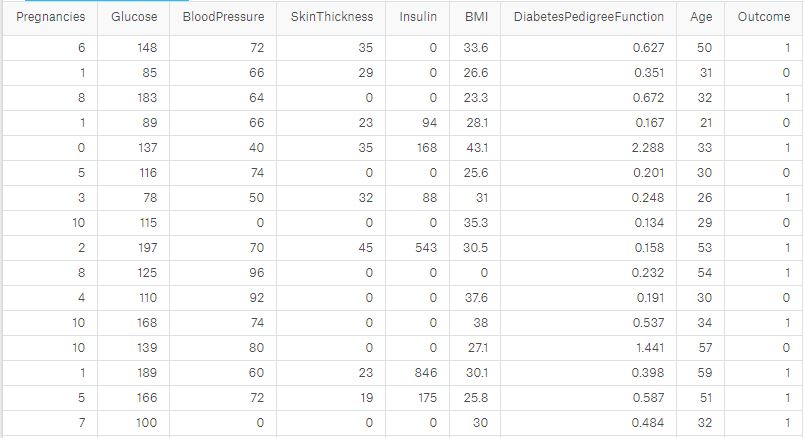

In [ ]:
# Dataset: ทำนายคนเป็นโรคเบาหวาน [https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset]
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

# vvvvvvvvvvvvvvvvvv
ds_source = "Kaggle"
# ^^^^^^^^^^^^^^^^^^
if ds_source == "local":
  # Option1: # โหลด dataset จากลิงก์โดยล็อคอินด้วยบัญชีที่สมัครกับ Kaggle และนำเข้าจากอุปกรณ์ส่วนตัวแปะลงบน file folder หรือชี้ไปที่ directory ที่เก็บไว้
  dir = './diabetes-dataset.csv'
  df = pd.read_csv(dir)
elif ds_source == "Kaggle":
  # Option2: ดาวน์โหลดชุดข้อมูลจาก library
  !pip install opendatasets
  import opendatasets as od
  od.download('https://www.kaggle.com/datasets/akshaydattatraykhare/diabetes-dataset')
  df = pd.read_csv('diabetes-dataset/diabetes.csv')


# Separate features (X) and target (y)
X = ...
y = ...

# Split data into training and testing sets
# ...

# Scale features
# ...

# Convert numpy arrays to PyTorch tensors
# ...

print("Data loaded, preprocessed, and converted to tensors.")
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

In [ ]:
# @title กำหนดโมเดล ตัวปรับปรุง พารามิเตอร์ขั้นสูง วนซ้ำฝึกฝน วนซ้ำทดสอบ และวัดความแม่นยำจากการจดจำ

# โมเดลจากข้อ 2.1, 2.2, และ 2.3 ตัวอย่างโมเดลสามารถหาได้จากไฟล์ NextGenAICamp_Practical Neural Networks (Tabular Data Processing).ipynb
class Diabete_cls_model...

# ตั้งค่าจากข้อ 1.
#################################
model_type = '...'
# Hyperparameters
lr = ...
batch_size = ...
epochs = ...
##################################

# ตัวโหลดข้อมูล (Dataloaders)
train_dataset = ...
train_loader = ...
val_dataset = ...
val_loader = ...


# กำหนดจำนวนตัวแปรและจำนวนโหนดที่ใช้ในโมเดล (Define model)
input_dim = ...
hidden_dim = ...
output_dim = ...
model_cls = ...


# กำหนดฟังก์ชั่นสูญเสียและปรับปรุง (Loss and optimizer)
criterion = ...
optimizer = ...

# กำหนดลิสเปล่าเพื่อเก็บค่าสำหรับคำนวณและแสดงผล (Lists to store loss and accuracy values)
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []
avg_train_acc = 0
avg_val_acc = 0

# Begin training loop
for epoch in range(epochs):
    model_cls.train()
    train_acc = 0
    epoch_train_loss = 0

    # วนซ้ำเพื่อฝึกและวัดความแม่นยำ
    for batch_X, batch_y in train_loader:
        # ...
        # ...
        # ...
        # ...
        # ...
        # ...
        # ...
        # ...
        # ...
        # ...

    avg_train_loss = epoch_train_loss / len(train_dataset)
    avg_train_acc = train_acc / len(train_dataset)
    # Average training loss and accuracy for the epoch
    train_losses.append(avg_train_loss)
    train_accuracies.append(avg_train_acc)

    # วนซ้ำเพื่อทดสอบและวัดความแม่นยำ
    model_cls.eval()
    val_acc = 0
    epoch_val_loss = 0
    for batch_val_X, batch_val_y in val_loader:
        with torch.no_grad():
            # ...
            # ...
            # ...
            # ...
            # ...

    avg_val_acc = val_acc / len(val_dataset)
    avg_val_loss = epoch_val_loss / len(val_dataset)
    # Average training loss and accuracy for the epoch
    val_losses.append(avg_val_loss)
    val_accuracies.append(avg_val_acc)

    print(f"Epoch {epoch + 1}/{epochs}, \
    Loss (train/val): {avg_train_loss:.4f}/{avg_val_loss:.4f}, \
    Accuracy (train/val): {avg_train_acc:.4f}/{avg_val_acc:.4f}")

In [ ]:
# @title ข้อ 3. บันทึกผลการทดสอบบนชุดข้อมูล 20% ที่แบ่งไว้จากโมเดลที่ดีที่สุด

# Convert to pandas DataFrame
df = pd.DataFrame(____.numpy(), columns=["Diagnosis results"])
# Save to CSV
df.to_csv("diagnosis_for_diabetes_test-val-set.csv", index=False)